In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import warnings
# importing os module 
import os
# Imports PIL module 
from keras.models import Model
from PIL import Image # for grabbing images
from itertools import chain #for target labels 
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from pathlib import Path
import seaborn as sns
import pandas as pd
import tensorflow
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

In [8]:
X_test=np.load("test_data.npy");
t_test=np.load("test_labels.npy");
num_of_output_classes=len(np.unique(t_test))
X_test=tensorflow.keras.applications.vgg16.preprocess_input(
    X_test, data_format=None
);

In [9]:
class_names=["Airport","Bareland","Beach","Bridge","Commerical","Dense Residental","Desert","Forest",
             "Industrial","Mountain","Parking","River","School","Sparse_Residental","Stadium"]

In [10]:
def conf_matrix_w_acc(y_test, labels):
    # Evaluate trained model in validation set
    cm = confusion_matrix(y_test, labels)
    acc =np.diagonal(cm).sum()/ cm.sum()
    # acc = accuracy_score(y_test,labels)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g', xticklabels = class_names, yticklabels = class_names)
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion Matrix (Accuracy = %f)' % acc, y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [11]:
def test(class_num,X_test,labels_test,model_name='vgg16_trained_cnn.hdf5',resized_pixel_size=100): 
        #Get Test Data Information, mainly for clarification on our end 
    
        #Setting up labels for keras model
        labels_test_model = np_utils.to_categorical(labels_test, num_classes=class_num)

        # Loads trained model 
        model = tensorflow.keras.models.load_model(model_name)

        #Can print model summary for illustration purposes
        #print(model.summary())

        #Evaluating model on test data 
        loss,accuracy=model.evaluate(X_test,labels_test_model)

        #Generates probability matrix of label assignment 
        y_proba = model.predict(X_test)

        #Grabs largest probability for each photo belonging to a certain class 
        y_classes = np.argmax(y_proba,axis=1)

        #Prints confustion matrix 
        print(conf_matrix_w_acc(labels_test, y_classes))
        
        return accuracy,y_classes

33/33 [==============================] - 0s 5ms/step - loss: 0.4287 - accuracy: 0.8692
None


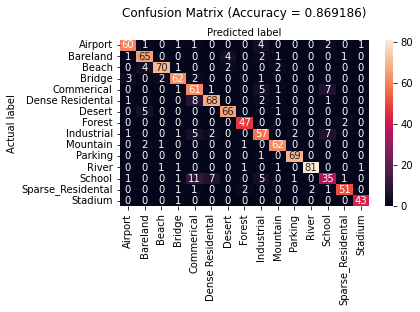

In [12]:
accuracy,y_classes=test(num_of_output_classes,X_test,t_test,model_name='vgg16_trained_cnn.hdf5',resized_pixel_size=100)